In [122]:
import numpy as np
import pandas as pd
import os
import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [123]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [125]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [126]:
data.drop(['RowNumber', 'CustomerId', 'Surname','Geography','Gender', 'Age'],axis=1,inplace=True)

In [127]:
data.shape

(10000, 8)

In [128]:
x=data.drop(["Exited"],axis=1)

In [129]:
x.shape

(10000, 7)

In [130]:
x.columns

Index(['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler=MinMaxScaler()
x[["CreditScore","EstimatedSalary"]]=scaler.fit_transform(x[["CreditScore","EstimatedSalary"]])

In [133]:
x.shape

(10000, 7)

In [134]:
y=data["Exited"]

In [135]:
y.shape

(10000,)

In [136]:
x1=np.array(x,dtype="float32")

In [137]:
x1=x1.reshape(-1,1)

In [138]:
x1

array([[0.538     ],
       [2.        ],
       [0.        ],
       ...,
       [1.        ],
       [0.        ],
       [0.19091423]], dtype=float32)

In [139]:
y1=np.array(y,dtype="float32")

In [140]:
x1.shape,y1.shape

((70000, 1), (10000,))

In [141]:
x2=x.values
y2=y.values

In [142]:
x2=torch.from_numpy(x2)
y2=torch.from_numpy(y2).view(-1,1)

In [144]:
x2[0]

tensor([0.5380, 2.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5067],
       dtype=torch.float64)

In [145]:
X_train,x_test,Y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=0)

In [146]:
# X_train = torch.from_numpy(X_train)
# y_train = torch.from_numpy(y_train).view(-1,1)

# # Numpy to Tensor Conversion (Train Set)
# X_test = torch.from_numpy(X_test)
# y_test = torch.from_numpy(y_test).view(-1,1)

# kaggle_test_set = torch.from_numpy(kaggle_test_set)

In [180]:
import torch.nn.functional as F

In [198]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim = 11, output_dim = 1):
        super(LogisticRegressionModel, self).__init__()
    
        # Input Layer (784) -> 784
        self.fc1 = nn.Linear(input_dim, 64)
        # 64 -> 64
        self.fc2 = nn.Linear(64, 64)
        # 64 -> 32
        self.fc3 = nn.Linear(64, 32)
        # 32 -> 32
        self.fc4 = nn.Linear(32, 32)
        # 32 -> output layer(10)
        self.output_layer = nn.Linear(32,1)
        # Dropout Layer (20%) to reduce overfitting
        self.dropout = nn.Dropout(0.2)
    
    # Feed Forward Function
    def forward(self, x):
        
        # Add ReLU activation function to each layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Add dropout layer
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
        
        # Return the created model
#         return F.softmax(x,dim=1)
        return nn.Sigmoid()(x)



In [205]:
input_dim = 7
output_dim=1
model=LogisticRegressionModel(input_dim, output_dim)

In [206]:
learning_rate=0.01
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9,nesterov = True)

In [207]:
print(model.parameters())
print(list(model.parameters())[0].size())

print(list(model.parameters())[1].size())


<generator object Module.parameters at 0x00000131BF9B0548>
torch.Size([64, 7])
torch.Size([64])


In [208]:
train = torch.utils.data.TensorDataset(X_train,Y_train)
test = torch.utils.data.TensorDataset(x_test,y_test)

# Create train and test data loaders
train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [209]:
loss_fn = nn.MSELoss()

In [210]:
epochs = 1000

# Some lists to keep track of loss and accuracy during each epoch
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

# Set the training mode ON -> Activate Dropout Layers
model.train() # prepare model for training

for epoch in range(epochs):
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    
    ###################
    # train the model #
    ###################
    
    # Calculate Accuracy         
    correct = 0
    total = 0
    for data,target in train_loader:
        data = Variable(data).float()
        target = Variable(target).type(torch.FloatTensor)
        #print("Target = ",target[0].item())
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        predicted = (torch.round(output.data[0]))
        # Total number of labels
        total += len(target)
        # Total correct predictions
        correct += (predicted == target).sum()

        # calculate the loss
        loss = loss_fn(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)

    # calculate average training loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    
    # Avg Accuracy
    accuracy = 100 * correct / float(total)
    # Put them in their list
    train_acc_list.append(accuracy)
    train_loss_list.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.4f}\t Acc: {:.2f}%'.format(
        epoch+1, 
        train_loss,
        accuracy
        ))
    # Move to next epoch
    epoch_list.append(epoch + 1)

Epoch: 1 	Training Loss: 0.2781	 Acc: 71.00%
Epoch: 2 	Training Loss: 0.1963	 Acc: 79.00%
Epoch: 3 	Training Loss: 0.1958	 Acc: 79.00%
Epoch: 4 	Training Loss: 0.1955	 Acc: 79.00%
Epoch: 5 	Training Loss: 0.1954	 Acc: 79.00%
Epoch: 6 	Training Loss: 0.1952	 Acc: 79.00%
Epoch: 7 	Training Loss: 0.1951	 Acc: 79.00%
Epoch: 8 	Training Loss: 0.1951	 Acc: 79.00%
Epoch: 9 	Training Loss: 0.1948	 Acc: 79.00%
Epoch: 10 	Training Loss: 0.1949	 Acc: 79.00%
Epoch: 11 	Training Loss: 0.1945	 Acc: 79.00%
Epoch: 12 	Training Loss: 0.1943	 Acc: 79.00%
Epoch: 13 	Training Loss: 0.1943	 Acc: 79.00%
Epoch: 14 	Training Loss: 0.1941	 Acc: 79.00%
Epoch: 15 	Training Loss: 0.1939	 Acc: 79.00%
Epoch: 16 	Training Loss: 0.1937	 Acc: 79.00%
Epoch: 17 	Training Loss: 0.1936	 Acc: 79.00%
Epoch: 18 	Training Loss: 0.1933	 Acc: 79.00%
Epoch: 19 	Training Loss: 0.1931	 Acc: 79.00%
Epoch: 20 	Training Loss: 0.1931	 Acc: 79.00%
Epoch: 21 	Training Loss: 0.1928	 Acc: 79.00%
Epoch: 22 	Training Loss: 0.1927	 Acc: 79.0

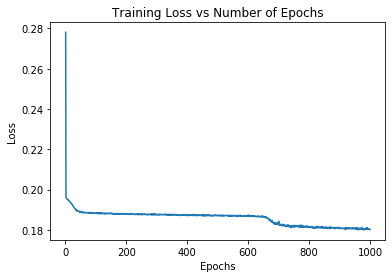

In [212]:
plt.plot(epoch_list,train_loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Number of Epochs")
plt.show()

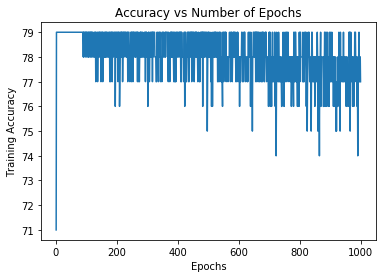

In [213]:
plt.plot(epoch_list,train_acc_list)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.show()

In [215]:
correct = 0
total = 0
val_loss = 0
model.eval() # Required for Evaluation/Test
with torch.no_grad():
    for data, target in test_loader:

        # Convert our images and labels to Variables to accumulate Gradients
        data = Variable(data).float()
        target = Variable(target).type(torch.FloatTensor)

        # Predict Output
        output = model(data)

        # Calculate Loss
        loss = loss_fn(output, target)
        val_loss += loss.item()*data.size(0)
        # Get predictions from the maximum value
        predicted = (torch.round(output.data[0]))

        # Total number of labels
        total += len(target)

        # Total correct predictions
        correct += (predicted == target).sum()
    
    # calculate average training loss and accuracy over an epoch
    val_loss = val_loss/len(test_loader.dataset)
    accuracy = 100 * correct/ float(total)
print("Accuracy = ",accuracy.item() * 0.01)

Accuracy =  0.78


In [217]:
kaggle_test_set = Variable(kaggle_test_set).float()

NameError: name 'kaggle_test_set' is not defined

In [218]:
results = []

# Set Evaluation Mode ON -> Turn Off Dropout
model.eval() # Required for Evaluation/Test

with torch.no_grad():
    for data in kaggle_test_set:
        output = model(data)
        pred = int((torch.round(output.data[0])).item())
        results.append(pred)

NameError: name 'kaggle_test_set' is not defined